<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>XGBoost Regression</h2>
</div>

### Table of contents : <br/>
1. Install xgboost
2. Importing libraries and dataset
3. EDA
3. Parameter description
4. Initialize xgboost model
5. Model building
4. xgboost hyperparameter tuning

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Importing libraries and dataset</h2>
</div>

In [1]:
# pip install xgboost

In [2]:
import pandas as pd # for data manupulation
import numpy as np # for numeric operation
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn and matplotlib for visualization

import xgboost as xgb
# xgboost for performing regression


from sklearn.model_selection import train_test_split, GridSearchCV
# train_test_split for splitting
# grid search for hyperparameter tuning

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#these are regression evaluation metric


import warnings
warnings.filterwarnings("ignore") # for not displaying warning
pd.set_option("display.max_columns", 100) # default number of rows to be displayed.

In [3]:
df = pd.read_csv('cardata.csv') #load the dataset
df.head() #print first 5 record

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>EDA</h2>
</div>

In [4]:
df.shape

(301, 9)

In [5]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

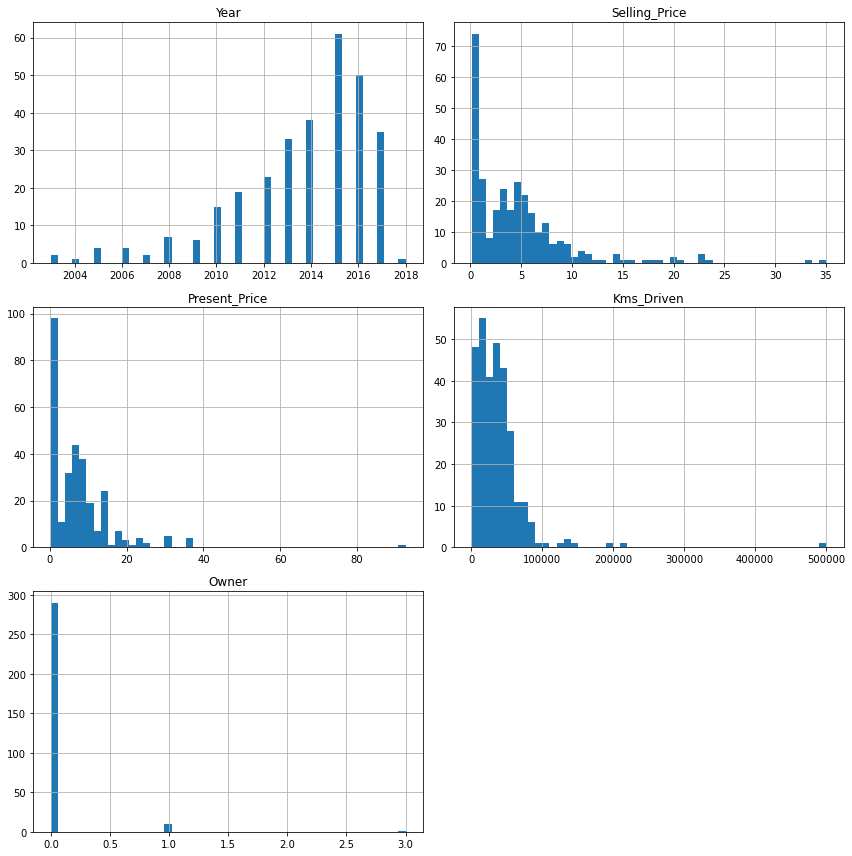

In [7]:
df.hist(figsize=(12,12),bins=50)
plt.tight_layout()

In [8]:
df = pd.get_dummies(df,columns = ["Car_Name","Fuel_Type","Seller_Type","Transmission"],drop_first = True)
df.head()

Year  Selling_Price  Present_Price  Kms_Driven  Owner  Car_Name_Activa 3g  \
0  2014           3.35           5.59       27000      0                   0   
1  2013           4.75           9.54       43000      0                   0   
2  2017           7.25           9.85        6900      0                   0   
3  2011           2.85           4.15        5200      0                   0   
4  2014           4.60           6.87       42450      0                   0   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0                   0                       0                           0   
1                   0                       0                           0   
2                   0                       0                           0   
3                   0                       0                           0   
4                   0                       0                           0   

   Car_Name_Bajaj Avenger 150 street  Car_Name_Bajaj Avenger 220  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   

   Car_Name_Bajaj Avenger 220 dtsi  Car_Name_Bajaj Avenger Street 220  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   Car_Name_Bajaj Discover 100  Car_Name_Bajaj Discover 125  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   Car_Name_Bajaj Dominar 400  Car_Name_Bajaj Pulsar  NS 200  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Car_Name_Bajaj Pulsar 135 LS  Car_Name_Bajaj Pulsar 150  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Car_Name_Bajaj Pulsar 220 F  Car_Name_Bajaj Pulsar NS 200  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   Car_Name_Bajaj Pulsar RS200  Car_Name_Hero  CBZ Xtreme  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   Car_Name_Hero  Ignitor Disc  Car_Name_Hero Extreme  Car_Name_Hero Glamour  \
0                            0                      0                      0   
1                            0                      0                      0   
2                            0                      0                      0   
3 

In [9]:
X=df.drop("Selling_Price",axis=1)
y=df["Selling_Price"]

#get feature and target variable

#### train test split

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#get training and testing data

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Parameters Description</h2>
</div>

- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. - Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.
- objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability
- n_jobs : The number of jobs to run in parallel and  -1 means using all processors.
- random_state: Controls both the randomness of the bootstrapping of the samples.
- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

- nthread: for parallel processing
- min_child_weight: minimum sum of instance weight needed in a child.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Initialize xgboost</h2>
</div>

In [11]:
xgb_rg = xgb.XGBRegressor()
#initialize the xgb classifier 
xgb_rg.fit(x_train, y_train)


y_pred = xgb_rg.predict(x_test)

In [12]:
#evaluation metric
print("Test  R2 Score : %.2f"%r2_score(y_test, y_pred))
print("Test  mae Score : %.2f"%mean_absolute_error(y_test, y_pred))
print("Test  mse Score : %.2f"%mean_squared_error(y_test, y_pred))

Test  R2 Score : 0.96
Test  mae Score : 0.61
Test  mse Score : 1.08


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- The model looks good as the R2 score is 96% and the mse and mae are also less

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model building</h2>
</div>

#### max_depth = 2
- Let's build model of maximum number of depth of tree as 2.

In [13]:
xgb_rg = xgb.XGBRegressor(max_depth=2)
#initialize the xgb classifier 
xgb_rg.fit(x_train, y_train)


y_pred = xgb_rg.predict(x_test)

#evaluation metric
print("Test  R2 Score : %.2f"%r2_score(y_test, y_pred))
print("Test  mae Score : %.2f"%mean_absolute_error(y_test, y_pred))
print("Test  mse Score : %.2f"%mean_squared_error(y_test, y_pred))

Test  R2 Score : 0.92
Test  mae Score : 0.82
Test  mse Score : 2.29


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- This model is not that good as R2 score has decreased and errors have increased

#### max_depth = 3
 Let's build model of maximum number of depth of tree as 3.

In [19]:
xgb_rg = xgb.XGBRegressor(max_depth=3)
#initialize the xgb classifier 
xgb_rg.fit(x_train, y_train)


y_pred = xgb_rg.predict(x_test)

#evaluation metric
print("Test  R2 Score : %.2f"%r2_score(y_test, y_pred))
print("Test  mae Score : %.2f"%mean_absolute_error(y_test, y_pred))
print("Test  mse Score : %.2f"%mean_squared_error(y_test, y_pred))

Test  R2 Score : 0.96
Test  mae Score : 0.56
Test  mse Score : 1.05


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- This model is good as R2 score has increased and errors have decreased

#### colsample_ bytree = 0.2
- Let's build model as 0.2 % of features per tree whcih is colsample_bytree.

In [15]:
xgb_rg = xgb.XGBRegressor(colsample_bytree = 0.2)
#initialize the xgb classifier 
xgb_rg.fit(x_train, y_train)


y_pred = xgb_rg.predict(x_test)

#evaluation metric
print("Test  R2 Score : %.2f"%r2_score(y_test, y_pred))
print("Test  mae Score : %.2f"%mean_absolute_error(y_test, y_pred))
print("Test  mse Score : %.2f"%mean_squared_error(y_test, y_pred))

Test  R2 Score : 0.91
Test  mae Score : 0.82
Test  mse Score : 2.70


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- This model is not that good as R2 score has decreased and errors have increased.

Rather than trying out manually let's go for hyperparameter tuning

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Hyperparameter Tuning</h2>
</div>

In [22]:
from sklearn.model_selection import GridSearchCV
#import grid searchcv for hypeparameter tuning

xgb_clf = xgb.XGBRegressor() #reg:linear for regression task
params = {
        'colsample_bytree':[0.6, 1],
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'gamma':[0, 0.1, 0.3],
        'reg_alpha':[0, 0.75],
        'reg_lambda':[0.45, 1] 
        }
#define params 


grid_search = GridSearchCV(xgb_clf, params, n_jobs=-1, cv = 3, verbose=1)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [23]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'colsample_bytree': 1,
 'gamma': 0.3,
 'max_depth': 3,
 'n_estimators': 200,
 'reg_alpha': 0,
 'reg_lambda': 0.45}

In [24]:

y_pred = xgb_rg.predict(x_test)

#evaluation metric
print("Test  R2 Score : %.2f"%r2_score(y_test, y_pred))
print("Test  mae Score : %.2f"%mean_absolute_error(y_test, y_pred))
print("Test  mse Score : %.2f"%mean_squared_error(y_test, y_pred))

Test  R2 Score : 0.96
Test  mae Score : 0.56
Test  mse Score : 1.05


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- This is the best model so far. It has been cross validated as well